# С какими задачами можно столкнуться и зачем вообще питонисту работать с данными?

- Компания собирала дату, "потому что это важно"
- Люди, которые проектировали "склад" данных уволились, сошли с ума или умерли
- Пришло время "извлечь из этого смыслы" и "применить кейсы"

Это означает, что потребуется разобрать авгиевы конюшни данных и построить какие-то модели машинного обучения. И тут-то все как раз и вспоминают про вас.

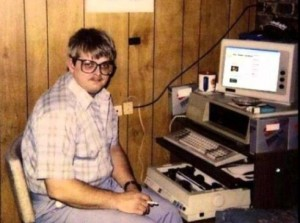

In [1]:
#main
import numpy as np
import pandas as pd
import pandas_profiling
import json

# support
import corelib

# csv to pd loader
from corelib.data_loader import loader

# reduce memory usage for pd-index
from corelib.data_prep import reduce_mem_usage
from corelib.data_prep import reduce_obj_mem_usage

# searching for unical ordered values
from corelib.data_prep import search_func

#dump data with
from corelib.data_dump import dumper

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 100)

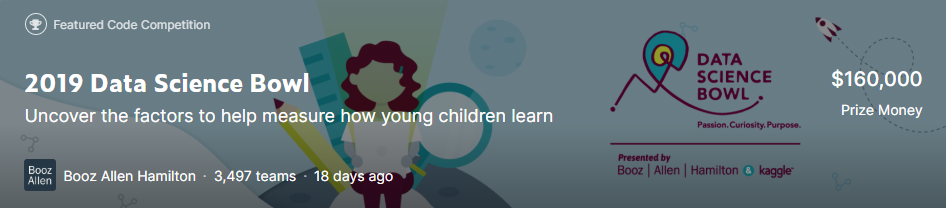

In this dataset, you are provided with game analytics for the PBS KIDS Measure Up! app. In this app, children navigate a map and complete various levels, which may be activities, video clips, games, or assessments. Each assessment is designed to test a child's comprehension of a certain set of measurement-related skills. There are five assessments: Bird Measurer, Cart Balancer, Cauldron Filler, Chest Sorter, and Mushroom Sorter.

[data-science-bowl-2019](https://www.kaggle.com/c/data-science-bowl-2019)

In [3]:
data = loader(mode='extract')
data.keys()

dict_keys(['train'])

In [4]:
df_train = data['train']
del data

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
installation_id    200000 non-null object
event_id           200000 non-null object
game_session       200000 non-null object
timestamp          200000 non-null object
event_data         200000 non-null object
event_count        200000 non-null int64
event_code         200000 non-null int64
game_time          200000 non-null int64
title              200000 non-null object
type               200000 non-null object
world              200000 non-null object
dtypes: int64(3), object(8)
memory usage: 16.8+ MB


In [7]:
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
installation_id    200000 non-null object
event_id           200000 non-null object
game_session       200000 non-null object
timestamp          200000 non-null object
event_data         200000 non-null object
event_count        200000 non-null int64
event_code         200000 non-null int64
game_time          200000 non-null int64
title              200000 non-null object
type               200000 non-null object
world              200000 non-null object
dtypes: int64(3), object(8)
memory usage: 147.3 MB


In [8]:
df_train.memory_usage(deep=True)

Index                   128
installation_id    13000000
event_id           13000000
game_session       14600000
timestamp          16200000
event_data         51761900
event_count         1600000
event_code          1600000
game_time           1600000
title              14984451
type               12625446
world              13474301
dtype: int64

### memory_usage

**deep** bool, default False
If True, introspect the data deeply by interrogating object dtypes for system-level memory consumption, and include it in the returned values.

[* ссылка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.memory_usage.html)

In [10]:
pandas_profiling.ProfileReport(df_train, minimal=True)

## Почему вообще данные нужно приводить к какому-то виду?

- большинство алгоритмов ML требует предварительной подготовки данных
- часто данные нужно привести к определенному виду для того-чтобы срослась математика - например нормализовать или привести к логарифмическому масштабу
- машинное обучение точно плохо понимает неразобранные составные объекты

### К тому же имеется проблема вычислительной сложности

Для большинства алгоритмов сложность по пространству/времени в основном сосредоточена на построении модели. Это хорошо для продакшена, но сильно увеличивает расходы на поиск решения.

In [12]:
# json unpack
df_train_extracted = pd.io.json.json_normalize(df_train['event_data'].apply(json.loads))

### pandas.json_normalize

Normalize semi-structured JSON data into a flat table

[* ссылка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html)

### json.load

json.load(fp, \*, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, \**kw)

Deserialize **fp** (a .read()-supporting text file or binary file containing a JSON document) to a Python object using this conversion table.

**object_hook** is an optional function that will be called with the result of any object literal decoded (a dict). The return value of object_hook will be used instead of the dict. This feature can be used to implement custom decoders (e.g. JSON-RPC class hinting).

**object_pairs_hook** is an optional function that will be called with the result of any object literal decoded with an ordered list of pairs. The return value of object_pairs_hook will be used instead of the dict. This feature can be used to implement custom decoders. If object_hook is also defined, the object_pairs_hook takes priority.

[* ссылка](https://docs.python.org/3/library/json.html)

[** разъяснение по object_hook и object_pairs_hook](https://stackoverflow.com/questions/54519626/understanding-object-pairs-hook-in-json-loads)

* * *

**DataFrame.apply**(self, func, axis=0, raw=False, result_type=None, args=(), \**kwds)

Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

[* ссылка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [13]:
pandas_profiling.ProfileReport(df_train_extracted, minimal=True)

TypeError: unhashable type: 'list'

In [12]:
# json unpack
df_train_extracted = pd.io.json.json_normalize(df_train['event_data'].apply(json.loads))

Какие есть объекты в пандас и почему возникла проблема с хешем

In [14]:
df_train_extracted.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 136 columns):
event_code                  int64
event_count                 int64
version                     object
game_time                   float64
description                 object
identifier                  object
media_type                  object
total_duration              float64
duration                    float64
coordinates.x               float64
coordinates.y               float64
coordinates.stage_width     float64
coordinates.stage_height    float64
castles_placed              object
molds                       object
size                        float64
sand                        float64
filled                      object
level                       float64
round                       float64
movie_id                    object
options                     object
animals                     object
round_target.size           float64
round_target.type           object
rou

In [15]:
df_train_extracted[['flower', 'flowers']].dropna().head(10)

,flower,flowers
2022,0.0,"[0, 0, 0, 0, 0]"
2026,0.0,"[0, 0, 0, 0, 8]"
2032,5.0,"[8, 8, 8, 7, 8]"
2034,5.0,"[8, 8, 8, 7, 0]"
2035,1.0,"[8, 8, 8, 7, 0]"
2036,1.0,"[0, 8, 8, 7, 0]"
2037,2.0,"[0, 8, 8, 7, 0]"
2038,2.0,"[0, 0, 8, 7, 0]"
2040,3.0,"[0, 0, 8, 7, 0]"
2041,3.0,"[0, 0, 0, 7, 0]"


In [16]:
df_train_extracted['shells'].dropna().head(10)

1128          [2, 3, 1]
1157       [2, 3, 2, 1]
1193    [2, 3, 2, 3, 2]
1245          [2, 3, 1]
1435          [2, 3, 1]
1459       [2, 3, 2, 1]
1484    [2, 3, 2, 1, 2]
3011          [2, 1, 2]
3042       [2, 1, 2, 1]
3070    [2, 1, 2, 1, 2]
Name: shells, dtype: object

In [17]:
df_train_extracted['bottles'].dropna().head(10)

3189    [{'color': 'blue', 'amount': 2}, {'color': 'blue', 'amount': 1}, {'color': 'purple', 'amount': 2...
3192    [{'color': 'blue', 'amount': 2}, {'color': 'blue', 'amount': 1}, {'color': 'purple', 'amount': 2...
3193    [{'color': 'blue', 'amount': 2}, {'color': 'blue', 'amount': 1}, {'color': 'purple', 'amount': 2...
3196    [{'color': 'blue', 'amount': 2}, {'color': 'blue', 'amount': 1}, {'color': 'purple', 'amount': 2...
3197    [{'color': 'blue', 'amount': 2}, {'color': 'blue', 'amount': 1}, {'color': 'purple', 'amount': 2...
3198    [{'color': 'blue', 'amount': 2}, {'color': 'blue', 'amount': 1}, {'color': 'purple', 'amount': 2...
3200    [{'color': 'blue', 'amount': 2}, {'color': 'blue', 'amount': 1}, {'color': 'purple', 'amount': 2...
3201    [{'color': 'blue', 'amount': 2}, {'color': 'blue', 'amount': 1}, {'color': 'purple', 'amount': 2...
3202    [{'color': 'blue', 'amount': 2}, {'color': 'blue', 'amount': 1}, {'color': 'purple', 'amount': 2...
3203    [{'color': 'blue', '

In [18]:
df_train_extracted['castles_placed'].dropna().head(10)

47                                                                                                      []
167                                                                                                     []
192              [{'size': 3, 'position': {'x': 567, 'y': 484, 'stage_width': 1015, 'stage_height': 762}}]
197    [{'size': 3, 'position': {'x': 567, 'y': 484, 'stage_width': 1015, 'stage_height': 762}}, {'size...
214    [{'size': 2, 'position': {'x': 568, 'y': 176, 'stage_width': 1015, 'stage_height': 762}}, {'size...
228    [{'size': 2, 'position': {'x': 568, 'y': 176, 'stage_width': 1015, 'stage_height': 762}}, {'size...
239    [{'size': 2, 'position': {'x': 773, 'y': 154, 'stage_width': 1015, 'stage_height': 762}}, {'size...
264    [{'size': 2, 'position': {'x': 773, 'y': 154, 'stage_width': 1015, 'stage_height': 762}}, {'size...
291                                                                                                     []
309              [{'size': 3, 'positi

In [23]:
df_train_extracted['description'].dropna().head(10)

3     Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The m...
4     Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The m...
18                                                          Drag the shovel to the molds to fill them up!
23                                                          Drag the shovel to the molds to fill them up!
30                                                                 When you're all done, tap this button.
32                                                                 When you're all done, tap this button.
41                                                          Drag the shovel to the molds to fill them up!
43                                                          Drag the shovel to the molds to fill them up!
48                                                          Drag the shovel to the molds to fill them up!
49                                            

In [19]:
df_train_extracted['filled'].dropna().head(10)

153    False
155    False
159     True
183     True
185    False
190     True
203    False
207    False
210     True
220    False
Name: filled, dtype: object

In [20]:
df_train_extracted.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 136 entries, event_code to chests
dtypes: float64(64), int64(2), object(70)
memory usage: 543.8 MB


In [21]:
df_train_extracted.memory_usage(deep=True)

Index                            128
event_code                   1600000
event_count                  1600000
version                      6466018
game_time                    1600000
description                 11735807
identifier                   9128648
media_type                   8634312
total_duration               1600000
duration                     1600000
coordinates.x                1600000
coordinates.y                1600000
coordinates.stage_width      1600000
coordinates.stage_height     1600000
castles_placed               6459048
molds                        6401440
size                         1600000
sand                         1600000
filled                       6406336
level                        1600000
round                        1600000
movie_id                     6442636
options                      6472784
animals                      6468368
round_target.size            1600000
round_target.type            6478669
round_target.animal          6479472
i

## Что еще можно встретить?

- пустые множества, словари и списки
- 'NONE', 'nul', 'none', '0' и т.п.
- false и true
- 'False', 'True', 'Yes', 'No'
и т.д. - список сильно неполный

In [ ]:
# reduce memory usage
df_train = reduce_mem_usage(df_train)

In [ ]:
df_train.info(memory_usage='deep')

Сравнение типов числе в пандас. Показать кусок кода

In [ ]:
# объекты и категориальные типы - сокращаем тут

In [ ]:
# замена пропусков

In [ ]:
# сериализация - нюансы

In [ ]:
# перегоняем в numpy и пример расчета модели, сравнение